<a href="https://colab.research.google.com/github/rajagopalmotivate/DeepLearnIITMA1/blob/master/Simple_Frezon_C_with_VAE_ver9_varD5_L6_GOOD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#@title


In [0]:
#@title
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [0]:
#@title
import matplotlib.pyplot as plt
image_index = 100 
print(y_train[image_index])
#plt.imshow(x_train[image_index], cmap='Greys')

8


In [0]:
#@title
# Reshaping the array to 4-dims 
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float 
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [0]:
#@title
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
#model00 = Sequential()
#model00.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
#model00.add(MaxPooling2D(pool_size=(2, 2)))
#model00.add(Flatten()) # Flattening the 2D arrays for fully connected layers
#model00.add(Dense(128, activation=tf.nn.relu))
#model00.add(Dropout(0.2))
#model00.add(Dense(10,activation=tf.nn.softmax))

In [0]:
#@title
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras.models import Model
from keras.layers import Input


inputtoClassifer = Input(shape=(28,28, 1),  name='inputtoclassifer')
model00layer1  = Conv2D(28, kernel_size=(3,3)) (inputtoClassifer)
model00layer2  = MaxPooling2D(pool_size=(2, 2)) (model00layer1)
model00layer3 = Flatten() (model00layer2)
model00layer4 = Dense(128, activation=tf.nn.relu) (model00layer3)
model00layer5 = Dropout(0.2) (model00layer4)
model00layer6 = Dense(10,activation=tf.nn.softmax) (model00layer5)

model00 = Model(inputs=inputtoClassifer, outputs=model00layer6 )


In [0]:
#@title
model00.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model00.fit(x=x_train,y=y_train, epochs=4)

Epoch 1/4
60000/60000 [==============================] - 12s 202us/step - loss: 0.4226 - acc: 0.8484
Epoch 2/4
60000/60000 [==============================] - 12s 193us/step - loss: 0.2877 - acc: 0.8955
Epoch 3/4
60000/60000 [==============================] - 12s 193us/step - loss: 0.2425 - acc: 0.9110
Epoch 4/4
60000/60000 [==============================] - 11s 191us/step - loss: 0.2126 - acc: 0.9218


In [0]:
#@title
model00.evaluate(x_test, y_test)


10000/10000 [==============================] - 1s 88us/step


[0.2636349117398262, 0.908]

In [0]:
#@title
image_index = 114
#plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
img_rows = 28
img_cols = 28

pred = model00.predict(x_test[image_index].reshape(1, img_rows, img_cols, 1))
print(pred.argmax())

5


In [0]:
#@title
all_layers = model00.layers
print(len(all_layers))

7


In [0]:
for i in range(len(all_layers)):
    all_layers[i].trainable = False

In [0]:
#@title
model00.trainable = False
model00.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [0]:
#model00.fit(x=x_train,y=y_train, epochs=1)

In [0]:
from keras.models import load_model

model00.save('Feb28model00.h5')  # creates a HDF5 file 
#del model00  # deletes the existing model

# returns a compiled model
# identical to the previous one
#model00 = load_model('Feb28model00.h5')

In [0]:
#modulerize

In [0]:
#@title
from keras.models import load_model

#model00 = load_model('Feb28model00.h5')

In [0]:
#@title
from keras.utils import plot_model
from google.colab import files



In [0]:
#@title
plot_model(model00, to_file='model00.png', show_shapes=True)

files.download('model00.png')



In [0]:
#@title


from keras.layers import Dense, Input
from keras.layers import Conv2D, Flatten, Lambda
from keras.layers import Reshape, Conv2DTranspose
from keras.models import Model
from keras.datasets import mnist, fashion_mnist, cifar10
from keras.losses import mse, binary_crossentropy
from keras import backend as K

import numpy as np
import matplotlib.pyplot as plt
import argparse
import os
import copy


# reparameterization trick
# instead of sampling from Q(z|X), sample eps = N(0,I)
# then z = z_mean + sqrt(var)*eps
def sampling(args):
    """Reparameterization trick by sampling fr an isotropic unit Gaussian.
    # Arguments:
        args (tensor): mean and log of variance of Q(z|X)
    # Returns:
        z (tensor): sampled latent vector
    """

    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    # by default, random_normal has mean=0 and std=1.0
    epsilon =  K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon







In [0]:
#@title
def plot_results2(models,
                 data,
                 batch_size=128,
                 model_name="vae_mnist"):
    """Plots labels and MNIST digits as function of 2-dim latent vector
    # Arguments:
        models (tuple): encoder and decoder models
        data (tuple): test data and label
        batch_size (int): prediction batch size
        model_name (string): which model is using this function
    """

    encoder, decoder = models
    x_test, y_test = data
    
   # os.makedirs(model_name, exist_ok=True)

    filename = os.path.join(model_name, "vae_mean.png")
    # display a 2D plot of the digit classes in the latent space
    z_mean, _, z = encoder.predict(x_test,
                                   batch_size=batch_size)
    
    print(z_mean[:, 0])
    plt.figure(figsize=(12, 10))
    plt.scatter(z_mean[:, 0], z_mean[:, 1], c='r')

#    plt.colorbar()
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
 #   plt.savefig(filename)
   # plt.show()
    plt.scatter(z[:, 0], z[:, 1], c='g')
    plt.show()







In [0]:
#@title
def plot_results(models,
                 data,
                 batch_size=128,
                 model_name="vae_mnist"):
    """Plots labels and MNIST digits as function of 2-dim latent vector
    # Arguments:
        models (tuple): encoder and decoder models
        data (tuple): test data and label
        batch_size (int): prediction batch size
        model_name (string): which model is using this function
    """

    encoder, decoder = models
    x_test, y_test = data
    os.makedirs(model_name, exist_ok=True)

    filename = os.path.join(model_name, "vae_mean.png")
    # display a 2D plot of the digit classes in the latent space
    z_mean, _, _ = encoder.predict(x_test,
                                   batch_size=batch_size)
  #  plt.figure(figsize=(12, 10))
  #  plt.scatter(z_mean[:, 0], z_mean[:, 1], c=y_test)
  #  plt.colorbar()
  #  plt.xlabel("z[0]")
  #  plt.ylabel("z[1]")
   # plt.savefig(filename)
   # plt.show()

    filename = os.path.join(model_name, "digits_over_latent.png")
    # display a 30x30 2D manifold of digits
    n = 30
    digit_size = 32
    figure = np.zeros((digit_size * n, digit_size * n, 3))
    # linearly spaced coordinates corresponding to the 2D plot
    # of digit classes in the latent space
    grid_x = np.linspace(-4, 4, n)
    grid_y = np.linspace(-4, 4, n)[::-1]

    for i, yi in enumerate(grid_y):
        for j, xi in enumerate(grid_x):
            z_sample = np.array([[xi, yi]])
            x_decoded = decoder.predict(z_sample)
            digit = x_decoded[0].reshape(digit_size, digit_size, 3)
            figure[i * digit_size: (i + 1) * digit_size,
                   j * digit_size: (j + 1) * digit_size] = digit

    plt.figure(figsize=(10, 10))
    start_range = digit_size // 2
    end_range = n * digit_size + start_range + 1
    pixel_range = np.arange(start_range, end_range, digit_size)
    sample_range_x = np.round(grid_x, 1)
    sample_range_y = np.round(grid_y, 1)
    plt.xticks(pixel_range, sample_range_x)
    plt.yticks(pixel_range, sample_range_y)
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.imshow(figure, cmap='Greys_r')
    plt.savefig(filename)
    plt.show()

In [0]:
#@title
# MNIST dataset
#(x_train, y_train), (x_test, y_test) = cifar10.load_data()

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


image_size = x_train.shape[1]
x_train = np.reshape(x_train, [-1, image_size, image_size, 1])
x_test = np.reshape(x_test, [-1, image_size, image_size, 1])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# network parameters
input_shape = (image_size, image_size, 1)
batch_size = 128
kernel_size = 5
filters = 16
latent_dim = 6
epochs = 10

# VAE model = encoder + decoder
# build encoder model
inputs = Input(shape=input_shape, name='encoder_input')
x = inputs
for i in range(2):
    filters *= 2
    x = Conv2D(filters=filters,
               kernel_size=kernel_size,
               activation='relu',
               strides=2,
               padding='same')(x)

# shape info needed to build decoder model
shape = K.int_shape(x)



In [0]:
#@title
# generate latent vector Q(z|X)
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
z_mean = Dense(latent_dim, name='z_mean')(x)
z_log_var = Dense(latent_dim, name='z_log_var')(x)



In [0]:
#@title
# use reparameterization trick to push the sampling out as input
# note that "output_shape" isn't necessary with the TensorFlow backend
z = Lambda(sampling, output_shape=(latent_dim,), name='z')([z_mean, z_log_var])



In [0]:
#@title
# instantiate encoder model
encoder = Model(inputs, [z_mean, z_log_var, z], name='encoder')
encoder.summary()
plot_model(encoder, to_file='vae_cnn_encoder.png', show_shapes=True)



__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_5 (Conv2D)               (None, 14, 14, 32)   832         encoder_input[0][0]              
__________________________________________________________________________________________________
conv2d_6 (Conv2D)               (None, 7, 7, 64)     51264       conv2d_5[0][0]                   
__________________________________________________________________________________________________
flatten_4 (Flatten)             (None, 3136)         0           conv2d_6[0][0]                   
__________________________________________________________________________________________________
dense_7 (D

In [0]:
#@title
# build decoder model
latent_inputs = Input(shape=(latent_dim,), name='z_sampling')
x = Dense(shape[1] * shape[2] * shape[3], activation='relu')(latent_inputs)
x = Reshape((shape[1], shape[2], shape[3]))(x)

for i in range(2):
    x = Conv2DTranspose(filters=filters,
                        kernel_size=kernel_size,
                        activation='relu',
                        strides=2,
                        padding='same')(x)
    filters //= 2

outputs = Conv2DTranspose(filters=1,
                          kernel_size=kernel_size,
                          activation='sigmoid',
                          padding='same',
                          name='decoder_output')(x)

# instantiate decoder model
decoder = Model(latent_inputs, outputs, name='decoder')
decoder.summary()
plot_model(decoder, to_file='vae_cnn_decoder.png', show_shapes=True)


decoderVisvalizer = Model(latent_inputs, x, name='decoderVisuvalizer')
plot_model(decoderVisvalizer, to_file='decoderVisuvalizer.png', show_shapes=True)




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
z_sampling (InputLayer)      (None, 6)                 0         
_________________________________________________________________
dense_8 (Dense)              (None, 3136)              21952     
_________________________________________________________________
reshape_2 (Reshape)          (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_transpose_3 (Conv2DTr (None, 14, 14, 64)        102464    
_________________________________________________________________
conv2d_transpose_4 (Conv2DTr (None, 28, 28, 32)        51232     
_________________________________________________________________
decoder_output (Conv2DTransp (None, 28, 28, 1)         801       
Total params: 176,449
Trainable params: 176,449
Non-trainable params: 0
_________________________________________________________________


In [0]:
#@title
# instantiate VAE model
outputs = decoder( encoder(inputs)[2] )
vae = Model(inputs, outputs, name='vae')



In [0]:
classiferoutputtensor = model00 ( decoder( encoder(inputs)[2] ) )

In [0]:
vaec = Model(inputs, classiferoutputtensor, name='vaec')

In [0]:
#@title
whatisthis = encoder(inputs)
print(whatisthis)

print(whatisthis[2])

[<tf.Tensor 'encoder_3/z_mean/BiasAdd:0' shape=(?, 6) dtype=float32>, <tf.Tensor 'encoder_3/z_log_var/BiasAdd:0' shape=(?, 6) dtype=float32>, <tf.Tensor 'encoder_3/z/add:0' shape=(?, 6) dtype=float32>]
Tensor("encoder_3/z/add:0", shape=(?, 6), dtype=float32)


In [0]:
#@title

#models = (encoder, decoder)
#data = (x_test, y_test)

typeoflossfun = True 
    # VAE loss = mse_loss or xent_loss + kl_loss
if typeoflossfun:
        reconstruction_loss = mse(K.flatten(inputs), K.flatten(outputs))
else:
        reconstruction_loss = binary_crossentropy(K.flatten(inputs),
                                                  K.flatten(outputs))

print(reconstruction_loss.shape)

reconstruction_loss *= image_size * image_size
print(reconstruction_loss.shape)
kl_loss = 1 + z_log_var - K.square(z_mean) - K.exp(z_log_var)

print(kl_loss.shape)

kl_loss = K.sum(kl_loss, axis=-1)
print(kl_loss.shape)

kl_loss *= -0.5


vae_loss = K.mean(reconstruction_loss + kl_loss)


print(vae_loss.shape)


vae.add_loss(vae_loss)




()
()
(?, 6)
(?,)
()


In [0]:
#@title ## Condition #1: Ensure the VAEC creates designs as similar to the design cluster you want


#@markdown #### 1. Consider this:

Desing_Consideration_1 = True #@param {type:"boolean"}
#@markdown    checked - recommendend to check atleast 1 design consideration to convert VAE to VAEC



#@markdown #### 2. Should the output be Similar or Dissimilar to this design condition?:

Include_Excluse_Condition_1 = False #@param ["False", "True"] {type:"raw"}
#@markdown    true - find me designs that have the condition 
#@markdown    false - find me designs that DO NOT have the condition 

#@markdown #### 3. Choose the Design condition (cluster):


Condition_1_cluster_number = 1 #@param {type:"slider", min:0, max:10, step:1}
#@markdown   Choose  the cluster no you want the generated design to look like 


Desing_Consideration_1 = int(Desing_Consideration_1)


In [0]:
#@title ## Condition #2: Add the next design consideration to the VAEC 

#@markdown #### 1. Consider this design constraint:

Desing_Consideration_2 = True #@param {type:"boolean"}
#@markdown   not selected  - ignore this design consideration  



#@markdown #### 2. Should the output be Similar or Dissimilar to this design condition?:

Include_Excluse_Condition_2 = True #@param ["False", "True"] {type:"raw"}
#@markdown    true - find me designs that have the condition 
#@markdown    false - find me designs that DO NOT have the condition 

#@markdown #### 3. Choose the Design condition (cluster):


Condition_2_cluster_number = 6 #@param {type:"slider", min:0, max:10, step:1}
#@markdown   Choose  the cluster no you want the generated design to look like 


Desing_Consideration_2 = int(Desing_Consideration_2)


In [0]:



#classifer_loss = K.sum(classifer_loss, axis=-1)


myvalue = classiferoutputtensor[:,Condition_1_cluster_number:Condition_1_cluster_number+1]

myvalue2 = classiferoutputtensor[:,Condition_2_cluster_number:Condition_2_cluster_number+1]

if(Include_Excluse_Condition_1):
  myvalue = myvalue - 1
  myvalue = - 1 * myvalue

if(Include_Excluse_Condition_2):
  myvalue2 = myvalue2 - 1
  myvalue2 = - 1 * myvalue2


print('myvalue shape')

print(myvalue.shape)


classifer_loss = K.sum(myvalue, axis=-1)

classifer_loss2 = K.sum(myvalue2, axis=-1)



print(classifer_loss.shape)

vaec_loss = K.mean( reconstruction_loss + kl_loss + 1000 * classifer_loss * Desing_Consideration_1 +  1000 * classifer_loss2 * Desing_Consideration_2  )





myvalue shape
(?, 1)
(?,)


In [0]:
#@title



if False: 

  #classifer_loss = K.sum(classifer_loss, axis=-1)


  myvalue = classiferoutputtensor[:,1:2]

  myvalue2 = classiferoutputtensor[:,4:5]

  #myvalue = myvalue - 1

  myvalue2 = myvalue2 - 1

  #myvalue = - 1 * myvalue

  myvalue2 = - 1 * myvalue2


  print('myvalue shape')

  print(myvalue.shape)


  classifer_loss = K.sum(myvalue, axis=-1)

  classifer_loss2 = K.sum(myvalue2, axis=-1)



  print(classifer_loss.shape)

  vaec_loss = K.mean( reconstruction_loss + kl_loss + 1000 * classifer_loss   )

  print(vaec_loss.shape)






In [0]:

print(vaec_loss.shape)

vaec.add_loss(vaec_loss)

()


In [0]:
print(vae_loss.shape)

()


In [0]:


vae.compile(optimizer='rmsprop')

vae.summary()
    
plot_model(vae, to_file='vae_cnn.png', show_shapes=True)        
#vae.save_weights('vae_cnn_mnist.h5')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   (None, 28, 28, 1)         0         
_________________________________________________________________
encoder (Model)              [(None, 6), (None, 6), (N 3276684   
_________________________________________________________________
decoder (Model)              (None, 28, 28, 1)         176449    
Total params: 3,453,133
Trainable params: 3,453,133
Non-trainable params: 0
_________________________________________________________________


In [0]:
import keras.optimizers
myoptimizer = keras.optimizers.RMSprop(lr=0.01)


#vaec.compile(optimizer='rmsprop')
vaec.compile(optimizer=myoptimizer)

vaec.summary()
plot_model(vaec, to_file='vaec.png', show_shapes=True)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   (None, 28, 28, 1)         0         
_________________________________________________________________
encoder (Model)              [(None, 6), (None, 6), (N 3276684   
_________________________________________________________________
decoder (Model)              (None, 28, 28, 1)         176449    
_________________________________________________________________
model_2 (Model)              (None, 10)                607394    
Total params: 4,060,527
Trainable params: 3,453,133
Non-trainable params: 607,394
_________________________________________________________________


In [0]:
files.download('vae_cnn_decoder.png')
files.download('vae_cnn_encoder.png')
files.download('vae_cnn.png')
files.download('decoderVisuvalizer.png')
files.download('vaec.png')




In [0]:
        # train the autoencoder
vae.fit(x_train,
                epochs=1,
                batch_size=batch_size,
                validation_data=(x_test, None))

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 19s 323us/step - loss: 39.1630 - val_loss: 29.7013


In [0]:
vaec.fit(x=x_train,
                epochs=1,
                batch_size=batch_size
                )

Epoch 1/1
60000/60000 [==============================] - 19s 319us/step - loss: 61.5615


In [0]:
digit_size = 28

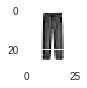

6


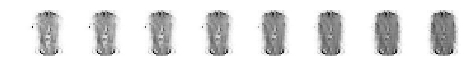

In [0]:
#@title 1. Given this design, create variations of this design. { run: "auto" }



input_design_number = "21" #@param ["1", "2", "3"] {allow-input: true}

level_of_variation = 9 #@param {type:"slider", min:0, max:30, step:1}



imagenumber = int(input_design_number)

whatisthis = encoder.predict(x_train[0+imagenumber:1+imagenumber])

thislatentvector = whatisthis[2]

imagenumber = imagenumber
aimageset = x_train[0+imagenumber:1+imagenumber]
aimage = aimageset[0]

#print(aimage.shape)

plt.figure(figsize=(4, 1))
plt.imshow(aimage.reshape(digit_size, digit_size))
plt.show()

#print( whatisthis[2])

  
#z_sample = np.array( [[i1, i2, i3, i4, i5, i6, i7, i8, i9, i10, i11, i12]] )

z_sample = thislatentvector


newZ_sample = copy.deepcopy (thislatentvector)

generatedlatenvector = thislatentvector[0]
newgeneratedlatenvector = copy.deepcopy(generatedlatenvector)

print(len(generatedlatenvector))

plt.figure(figsize=(16, 16))

pltcount = 1 
for k in range(-4, 4, 1):
  for i in range(len(generatedlatenvector)):
    newgeneratedlatenvector[i] = generatedlatenvector[i] + 0.01*k * level_of_variation
  x_decoded = decoder.predict( [[newgeneratedlatenvector]] )
  digit = x_decoded[0].reshape(digit_size, digit_size)
  plt.subplot(16 , 16 , pltcount)
  plt.imshow(digit)
  plt.axis('off')

  pltcount = pltcount + 1
  if(pltcount>=16):
    break
plt.show()













25


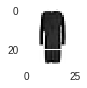

6


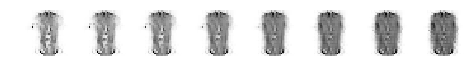

31


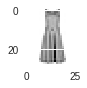

6


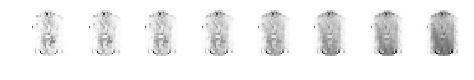

47


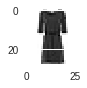

6


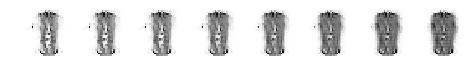

49


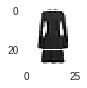

6


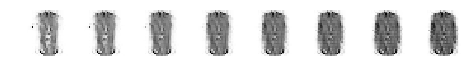

50


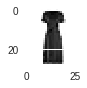

6


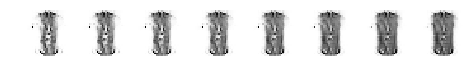

51


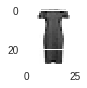

6


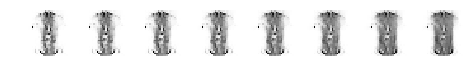

58


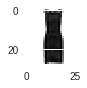

6


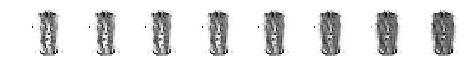

59


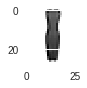

6


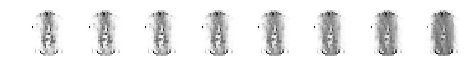

70


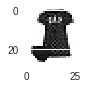

6


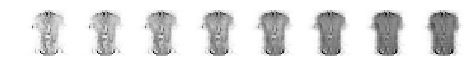

73


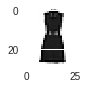

6


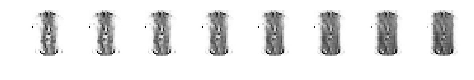

In [0]:
#@title 1. Given this design, create variations of this design. { run: "auto" }


input_class_number = 3 #@param {type:"slider", min:0, max:10, step:1}

input_design_number = "21" #@param ["1", "2", "3"] {allow-input: true}

level_of_variation = 15 #@param {type:"slider", min:0, max:30, step:1}


imagenumber = int(input_design_number)

counting = 0 

while counting < 10:
   
  counting = counting + 1 
   

  while (y_train[imagenumber] != input_class_number) :
     imagenumber = imagenumber + 1


  print(imagenumber)
  whatisthis = encoder.predict(x_train[0+imagenumber:1+imagenumber])

  thislatentvector = whatisthis[2]

  imagenumber = imagenumber
  aimageset = x_train[0+imagenumber:1+imagenumber]
  aimage = aimageset[0]

  #print(aimage.shape)

  plt.figure(figsize=(4, 1))
  plt.imshow(aimage.reshape(digit_size, digit_size))
  plt.show()

  #print( whatisthis[2])


  #z_sample = np.array( [[i1, i2, i3, i4, i5, i6, i7, i8, i9, i10, i11, i12]] )

  z_sample = thislatentvector


  newZ_sample = copy.deepcopy (thislatentvector)

  generatedlatenvector = thislatentvector[0]
  newgeneratedlatenvector = copy.deepcopy(generatedlatenvector)

  print(len(generatedlatenvector))

  plt.figure(figsize=(16, 16))

  pltcount = 1 
  for k in range(-4, 4, 1):
    for i in range(len(generatedlatenvector)):
      newgeneratedlatenvector[i] = generatedlatenvector[i] + 0.01*k * level_of_variation
    x_decoded = decoder.predict( [[newgeneratedlatenvector]] )
    digit = x_decoded[0].reshape(digit_size, digit_size)
    plt.subplot(16 , 16 , pltcount)
    plt.imshow(digit)
    plt.axis('off')

    pltcount = pltcount + 1
    if(pltcount>=16):
      break
  plt.show()
  
  imagenumber = imagenumber + 1














LATENT vector SHAPE (1, 6)
LATENT vector is [[-0.97411454  1.0520891  -0.12343849  0.46889958 -1.1568816  -1.2672082 ]]
(28, 28)


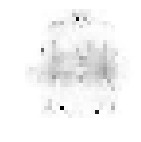

[[3.1722766e-07 3.4463675e-11 1.4277708e-07 1.3865761e-09 4.7294509e-07
  2.0973665e-09 9.9999881e-01 3.6586182e-11 1.9398895e-07 1.6077641e-08]]
predtemp
Tensor("Sum_10:0", shape=(1,), dtype=float32)
Tensor("strided_slice_8:0", shape=(), dtype=float32)
6


In [0]:
#@title 1. Select the image and find its latent vector. { run: "auto" }

digit_size = 28

sampleimage = "14" #@param ["1", "2", "3"] {allow-input: true}

imagenumber = int(sampleimage)

whatisthis = encoder.predict(x_train[0+imagenumber:1+imagenumber])

thislatentvector = whatisthis[2]

imagenumber = imagenumber
aimageset = x_train[0+imagenumber:1+imagenumber]
aimage = aimageset[0]

#print(aimage.shape)

plt.figure(figsize=(8, 2))
#plt.imshow(aimage)
#plt.show()

#print( whatisthis[2])

  

z_sample = thislatentvector

print('LATENT vector SHAPE ' + str(z_sample.shape) )

print('LATENT vector is ' + str(z_sample) )

x_decoded = decoder.predict( [z_sample] )
#digit = x_decoded[0].reshape(digit_size, digit_size, 1)
digit = x_decoded[0].reshape(digit_size, digit_size)


print(digit.shape)

#for i in range(12):
#  print(int(round( thislatentvector[0][i]) ))

plt.axis('off')
#plt.imshow(digit, cmap='gray')
plt.imshow(digit)
#plt.imshow(digit, cmap='Greys_r',)
plt.show()


#image_index = 4442
#plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
img_rows = 28
img_cols = 28

pred = model00.predict(digit.reshape(1, img_rows, img_cols, 1))

print(pred)
predtemp = K.sum(pred, axis=-1)
print('predtemp')
print(predtemp)
print(predtemp[0])


print(pred.argmax())

In [0]:
digit_size = 28

sampleimage = "70" #@param ["1", "2", "3"] {allow-input: true}

imagenumber = int(sampleimage)

latentvector1 = encoder.predict(x_train[0+imagenumber:1+imagenumber])


print( np.round(latentvector1,1))

[[[-0.1 -0.2  0.   0.1 -0.2  0.4]]

 [[-0.2 -2.  -1.5 -0.4 -2.9 -2.6]]

 [[-1.9 -0.2 -0.2  1.   0.2  0.6]]]


In [0]:
digit_size = 28

sampleimage = "1" #@param ["1", "2", "3"] {allow-input: true}

imagenumber = int(sampleimage)

latentvector1 = encoder.predict(x_train[0+imagenumber:1+imagenumber])

latentvector1actual = latentvector1[2]

latentvector1actual = latentvector1actual.reshape(6)

print(latentvector1actual.shape[0])

print( np.round(latentvector1actual, 2))

print( np.round(latentvector1actual[2], 2))

vector1 = latentvector1actual




6
[-0.53 -0.49 -0.12 -0.1  -0.47  0.78]
-0.12


In [0]:
digit_size = 28

sampleimage = "2100" #@param ["1", "2", "3"] {allow-input: true}

imagenumber = int(sampleimage)

latentvector1 = encoder.predict(x_train[0+imagenumber:1+imagenumber])

latentvector1actual = latentvector1[2]

latentvector1actual = latentvector1actual.reshape(6)

print(latentvector1actual.shape[0])

print( np.round(latentvector1actual, 2))

print( np.round(latentvector1actual[2], 2))

vector2 = latentvector1actual


6
[-1.81 -0.75  0.21 -0.73 -1.55  0.37]
0.21


In [0]:
vector1 = vector1 * 10000
vector2 = vector2 * 10000


vector1 =  np.round(vector1)
vector2 = np.round(vector2)

newvector = copy.copy(vector2)

print(vector1)
print(vector2)

[-5275. -4920. -1172. -1033. -4719.  7753.]
[-18088.  -7487.   2107.  -7272. -15523.   3704.]


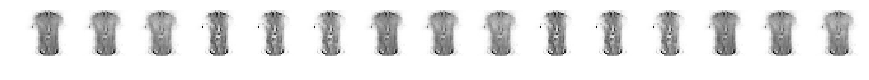

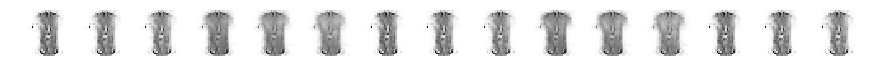

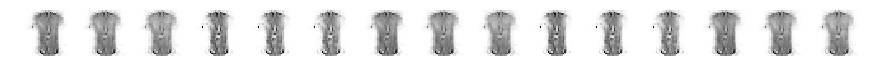

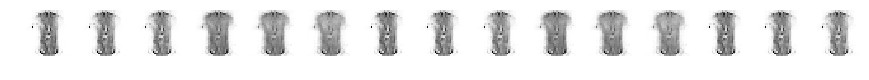

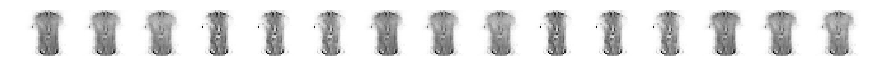

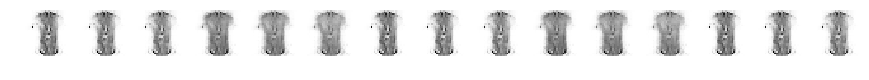

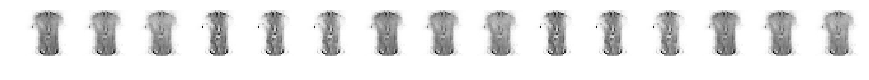

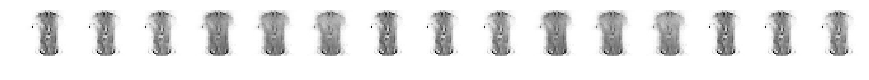

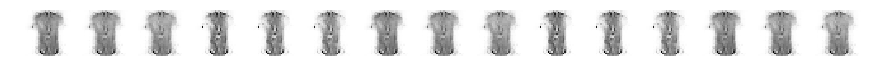

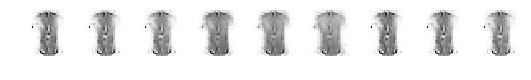

In [0]:
countingdofast = 0
plt.figure(figsize=(16, 16))
pltcount = 1
digit_size = 28
divideby = 2


for x1 in range( (int)(vector1[0]), (int)(vector2[0]),  (int)(np.round((vector2[0] - vector1[0])/divideby)) ):
  for x2 in range( (int)(vector1[1]), (int)(vector2[1]),  (int)(np.round((vector2[1] - vector1[1])/divideby)) ):
    for x3 in range( (int)(vector1[2]), (int)(vector2[2]),  (int)(np.round((vector2[2] - vector1[2])/divideby)) ):
      for x4 in range( (int)(vector1[3]), (int)(vector2[3]),  (int)(np.round((vector2[3] - vector1[3])/divideby)) ):
        for x5 in range( (int)(vector1[4]), (int)(vector2[4]),  (int)(np.round((vector2[4] - vector1[4])/divideby)) ):
          for x6 in range( (int)(vector1[5]), (int)(vector2[5]),  (int)(np.round((vector2[5] - vector1[5])/divideby)) ):
            newvector[0] =  x1
            newvector[1] =  x2
            newvector[2] =  x3
            newvector[3] =  x4
            newvector[4] =  x5
            newvector[5] =  x6        
            #print (newvector)
            newvector = newvector / 10000
            x_decoded = decoder.predict( [[newvector]] )
            countingdofast = countingdofast + 1
            digit = x_decoded[0].reshape(digit_size, digit_size)
            plt.subplot(16 , 16 , pltcount)
            plt.imshow(digit)
            plt.axis('off')            
            pltcount = pltcount + 1
            if(pltcount>=16):
              plt.show()
              plt.figure(figsize=(16, 16))
              pltcount = 1
              

  

